**scipy.stats.boxcox()** 
* применяется для трансформации данных (обычно числовых признаков), чтобы сделать распределение приближенным к нормальному — это важно, например, при использовании ANOVA, линейной регрессии и других моделей, чувствительных к нормальности.
* **boxcox** -- работает только с `положительными` переменными

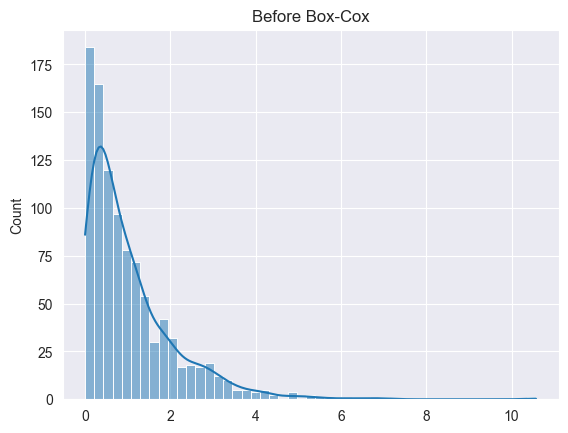

Lambda: 0.2759181368279024


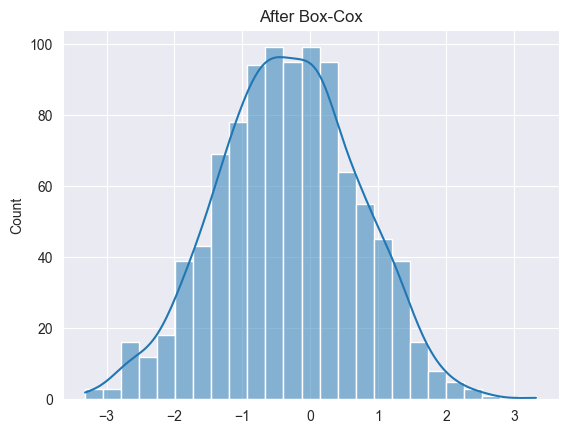

In [1]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

# Пример: положительно смещённые данные
import numpy as np
y = np.random.exponential(size=1000)

# До трансформации
sns.histplot(y, kde=True)
plt.title("Before Box-Cox")
plt.show()

# Box-Cox трансформация
y_bc, lam = boxcox(y)
print("Lambda:", lam)

# После трансформации
sns.histplot(y_bc, kde=True)
plt.title("After Box-Cox")
plt.show()


In [1]:
from scipy import stats
from scipy.special import inv_boxcox

# Преобразуем
y_trans, lmbda = stats.boxcox([10, 20, 30, 40])

# Предположим, модель вернула предсказание:
y_pred_trans = 2.8  # в Box-Cox масштабе

# Обратное преобразование
y_pred_orig = inv_boxcox(y_pred_trans, lmbda)

print(f"Предсказание в исходном масштабе: {y_pred_orig:.2f}")


Предсказание в исходном масштабе: 4.88


**Logit** — это реализация `логистической регрессии` в модуле **statsmodels.discrete.discrete_model**
* `Logit()` X не должен содержать `категориальных` переменных в исходном виде — нужно применять pd.get_dummies().
*  В ручную добавляем свободный член `sm.add_constant(X)` — иначе не будет свободного члена.

In [3]:
# Примерные данные: будет ли человек курить (1) в зависимости от возраста
df = pd.DataFrame({
    'age': [20, 22, 25, 30, 35, 40, 45, 50, 55, 60],
    'smoke': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
})

X = sm.add_constant(df['age'])  # добавляем константу (intercept)
y = df['smoke']

model = Logit(y, X)
result = model.fit()

print(result.summary())

C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or predictio

         Current function value: -0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  smoke   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                   1.000
Time:                        12:56:32   Log-Likelihood:                 0.0000
converged:                      False   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                 0.0004735
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -443.9589   4.03e+16   -1.1e-14      1.000    -7.9e+16     7.9e+16
age           16.1473   1.61e+15      1e-14      1.000   -3.16e+